In [6]:
import tensorflow as tf
from tensorflow import keras

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [3]:
#Sequential model 

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
363/363 [==============================] - 0s 649us/step - loss: 2.0076 - val_loss: 1.0466
Epoch 2/20
363/363 [==============================] - 0s 429us/step - loss: 0.8062 - val_loss: 0.9158
Epoch 3/20
363/363 [==============================] - 0s 444us/step - loss: 0.6854 - val_loss: 0.7002
Epoch 4/20
363/363 [==============================] - 0s 459us/step - loss: 0.6337 - val_loss: 0.5929
Epoch 5/20
363/363 [==============================] - 0s 452us/step - loss: 0.5977 - val_loss: 0.6036
Epoch 6/20
363/363 [==============================] - 0s 435us/step - loss: 0.5689 - val_loss: 0.6729
Epoch 7/20
363/363 [==============================] - 0s 433us/step - loss: 0.5493 - val_loss: 0.5215
Epoch 8/20
363/363 [==============================] - 0s 440us/step - loss: 0.5295 - val_loss: 0.5203
Epoch 9/20
363/363 [==============================] - 0s 441us/step - loss: 0.5122 - val_loss: 0.5295
Epoch 10/20
363/363 [==============================] - 0s 435us/step - loss: 0.499

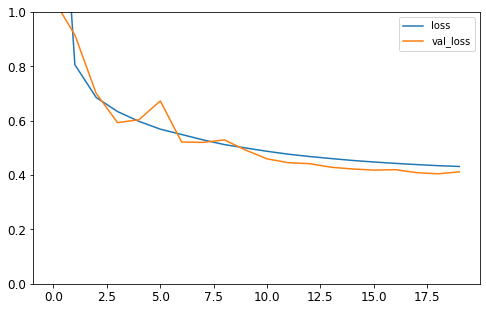

In [7]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.show()

In [4]:
#non-sequential model, slightly lower error than above

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model2 = keras.models.Model(inputs=[input_], outputs=[output])

In [8]:
model2.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model2.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model2.predict(X_new)

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
363/363 [==============================] - 0s 649us/step - loss: 2.1425 - val_loss: 1.3821
Epoch 2/20
363/363 [==============================] - 0s 485us/step - loss: 0.7283 - val_loss: 1.5703
Epoch 3/20
363/363 [==============================] - 0s 497us/step - loss: 0.6611 - val_loss: 0.7650
Epoch 4/20
363/363 [==============================] - 0s 490us/step - loss: 0.6179 - val_loss: 0.7814
Epoch 5/20
363/363 [==============================] - 0s 519us/step - loss: 0.5832 - val_loss: 0.5626
Epoch 6/20
363/363 [==============================] - 0s 480us/step - loss: 0.5559 - val_loss: 0.5132
Epoch 7/20
363/363 [==============================] - 0s 486us/step - loss: 0.5333 - val_loss: 0.4982
Epoch 8/20
363/363 [==============================] - 0s 475us/step - loss: 0.5151 - val_loss: 0.4826
Epoch 9/20
363/363 [==============================] - 0s 482us/step - loss: 0.4989 - val_loss: 0.5133
Epoch 10/20
363/363 [==============================] - 0s 487us/step - loss: 0.484

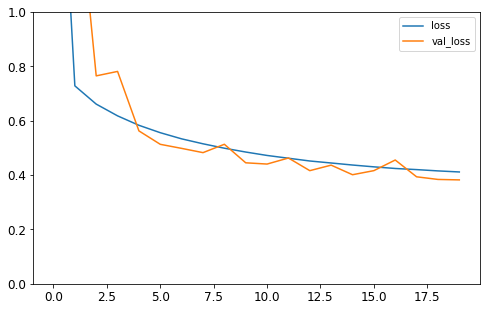

In [9]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
model2.save("California_housing_model.h5")

In [11]:
#can read in a pretrained model
model3=keras.models.load_model("California_housing_model.h5")

In [13]:
hidden1 = model3.layers[1] # can access pretrained data this way! cool!`
biases

array([-0.03951243,  0.09391998,  0.01032066, -0.05685046,  0.02718759,
        0.19476122,  0.2025007 ,  0.18689093, -0.12111852,  0.0883399 ,
        0.03821221,  0.06951358,  0.01669306,  0.00696984,  0.12663412,
        0.02689267,  0.02243913,  0.00049105,  0.05078918, -0.10135572,
        0.06226638,  0.04079798,  0.02751462,  0.0024314 ,  0.13151422,
       -0.00949035,  0.16825634, -0.02908104, -0.00877194,  0.01775339],
      dtype=float32)

In [14]:
#how to perform GridSearch in keras?

#step1: create a wrapper around the model

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [16]:
#step2: use sklearn as before
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=4,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/4
  1/242 [..............................] - ETA: 33s - loss: 7.4545

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 826us/step - loss: 0.8942 - val_loss: 5.6068
Epoch 2/4
242/242 [==============================] - 0s 539us/step - loss: 0.5479 - val_loss: 27.4064
Epoch 3/4
242/242 [==============================] - 0s 539us/step - loss: 0.6143 - val_loss: 7.3477
Epoch 4/4
121/121 [==============================] - 0s 319us/step - loss: 0.4235
[CV] END learning_rate=0.00933228808914177, n_hidden=2, n_neurons=73; total time=   0.8s
Epoch 1/4
  1/242 [..............................] - ETA: 34s - loss: 6.4974

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 807us/step - loss: 0.8635 - val_loss: 0.6408
Epoch 2/4
242/242 [==============================] - 0s 537us/step - loss: 0.4561 - val_loss: 1.0109
Epoch 3/4
242/242 [==============================] - 0s 552us/step - loss: 0.4084 - val_loss: 0.4804
Epoch 4/4
121/121 [==============================] - 0s 316us/step - loss: 0.3844
[CV] END learning_rate=0.00933228808914177, n_hidden=2, n_neurons=73; total time=   0.8s
Epoch 1/4
  1/242 [..............................] - ETA: 33s - loss: 5.1473

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 833us/step - loss: 0.8670 - val_loss: 1.0932
Epoch 2/4
242/242 [==============================] - 0s 594us/step - loss: 0.5129 - val_loss: 8.7498
Epoch 3/4
242/242 [==============================] - 0s 546us/step - loss: 0.5263 - val_loss: 1.5968
Epoch 4/4
121/121 [==============================] - 0s 323us/step - loss: 0.3863
[CV] END learning_rate=0.00933228808914177, n_hidden=2, n_neurons=73; total time=   0.8s
Epoch 1/4
  1/242 [..............................] - ETA: 33s - loss: 8.2988

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 860us/step - loss: 0.7307 - val_loss: 2.5470
Epoch 2/4
242/242 [==============================] - 0s 631us/step - loss: 0.4710 - val_loss: 18.9677
Epoch 3/4
242/242 [==============================] - 0s 638us/step - loss: 0.5425 - val_loss: 31.3880
Epoch 4/4
121/121 [==============================] - 0s 362us/step - loss: 0.4054
[CV] END learning_rate=0.012941186463943967, n_hidden=2, n_neurons=97; total time=   0.9s
Epoch 1/4
  1/242 [..............................] - ETA: 33s - loss: 6.8438

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 862us/step - loss: 0.7412 - val_loss: 0.4556
Epoch 2/4
242/242 [==============================] - 0s 609us/step - loss: 0.4279 - val_loss: 0.3963
Epoch 3/4
242/242 [==============================] - 0s 608us/step - loss: 0.3913 - val_loss: 0.7741
Epoch 4/4
121/121 [==============================] - 0s 328us/step - loss: 0.3798
[CV] END learning_rate=0.012941186463943967, n_hidden=2, n_neurons=97; total time=   0.9s
Epoch 1/4


/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 824us/step - loss: 0.7781 - val_loss: 2.5214
Epoch 2/4
242/242 [==============================] - 0s 606us/step - loss: 0.4282 - val_loss: 1.7829
Epoch 3/4
242/242 [==============================] - 0s 590us/step - loss: 0.4390 - val_loss: 2.2651
Epoch 4/4
121/121 [==============================] - 0s 338us/step - loss: 0.3680
[CV] END learning_rate=0.012941186463943967, n_hidden=2, n_neurons=97; total time=   1.0s
Epoch 1/4
117/242 [=============>................] - ETA: 0s - loss: 1.3218 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 770us/step - loss: 1.0338 - val_loss: 23.2827
Epoch 2/4
242/242 [==============================] - 0s 524us/step - loss: 0.7166 - val_loss: 23.1826
Epoch 3/4
242/242 [==============================] - 0s 535us/step - loss: 0.6219 - val_loss: 22.7193
Epoch 4/4
121/121 [==============================] - 0s 338us/step - loss: 0.4479
[CV] END learning_rate=0.008524985092685355, n_hidden=1, n_neurons=33; total time=   0.8s
Epoch 1/4
122/242 [==============>...............] - ETA: 0s - loss: 1.3956 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 761us/step - loss: 1.0299 - val_loss: 0.7958
Epoch 2/4
242/242 [==============================] - 0s 506us/step - loss: 0.5240 - val_loss: 2.1223
Epoch 3/4
242/242 [==============================] - 0s 499us/step - loss: 0.4655 - val_loss: 1.3832
Epoch 4/4
121/121 [==============================] - 0s 325us/step - loss: 0.4555
[CV] END learning_rate=0.008524985092685355, n_hidden=1, n_neurons=33; total time=   0.8s
Epoch 1/4
117/242 [=============>................] - ETA: 0s - loss: 0.9767 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 800us/step - loss: 0.7918 - val_loss: 0.8374
Epoch 2/4
242/242 [==============================] - 0s 558us/step - loss: 0.5208 - val_loss: 2.5024
Epoch 3/4
242/242 [==============================] - 0s 516us/step - loss: 0.4962 - val_loss: 13.2193
Epoch 4/4
121/121 [==============================] - 0s 323us/step - loss: 0.4358
[CV] END learning_rate=0.008524985092685355, n_hidden=1, n_neurons=33; total time=   0.8s
Epoch 1/4
149/242 [=================>............] - ETA: 0s - loss: 6.7559 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 668us/step - loss: 5.9954 - val_loss: 4.7722
Epoch 2/4
242/242 [==============================] - 0s 475us/step - loss: 2.6492 - val_loss: 2.0518
Epoch 3/4
242/242 [==============================] - 0s 480us/step - loss: 1.4221 - val_loss: 1.1700
Epoch 4/4
121/121 [==============================] - 0s 309us/step - loss: 0.8275
[CV] END learning_rate=0.001031518621637587, n_hidden=0, n_neurons=58; total time=   0.7s
Epoch 1/4
145/242 [================>.............] - ETA: 0s - loss: 4.4816 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 687us/step - loss: 3.8689 - val_loss: 7.0871
Epoch 2/4
242/242 [==============================] - 0s 488us/step - loss: 1.8607 - val_loss: 6.8621
Epoch 3/4
242/242 [==============================] - 0s 483us/step - loss: 1.1018 - val_loss: 7.4156
Epoch 4/4
121/121 [==============================] - 0s 314us/step - loss: 0.9192
[CV] END learning_rate=0.001031518621637587, n_hidden=0, n_neurons=58; total time=   0.7s
Epoch 1/4
143/242 [================>.............] - ETA: 0s - loss: 5.1484 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 689us/step - loss: 4.1749 - val_loss: 7.0944
Epoch 2/4
242/242 [==============================] - 0s 485us/step - loss: 1.7376 - val_loss: 1.3106
Epoch 3/4
242/242 [==============================] - 0s 490us/step - loss: 0.9892 - val_loss: 0.7909
Epoch 4/4
121/121 [==============================] - 0s 303us/step - loss: 0.6833
[CV] END learning_rate=0.001031518621637587, n_hidden=0, n_neurons=58; total time=   0.7s
Epoch 1/4
143/242 [================>.............] - ETA: 0s - loss: 6.5793 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 688us/step - loss: 5.2827 - val_loss: 4.7646
Epoch 2/4
242/242 [==============================] - 0s 479us/step - loss: 1.9565 - val_loss: 1.2904
Epoch 3/4
242/242 [==============================] - 0s 472us/step - loss: 1.0897 - val_loss: 0.9271
Epoch 4/4
121/121 [==============================] - 0s 299us/step - loss: 0.7641
[CV] END learning_rate=0.0011236311303186545, n_hidden=0, n_neurons=8; total time=   0.7s
Epoch 1/4
146/242 [=================>............] - ETA: 0s - loss: 5.2858 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 677us/step - loss: 4.4198 - val_loss: 26.5369
Epoch 2/4
242/242 [==============================] - 0s 471us/step - loss: 1.7952 - val_loss: 25.3715
Epoch 3/4
242/242 [==============================] - 0s 477us/step - loss: 1.0179 - val_loss: 24.9635
Epoch 4/4
121/121 [==============================] - 0s 296us/step - loss: 1.2887
[CV] END learning_rate=0.0011236311303186545, n_hidden=0, n_neurons=8; total time=   0.7s
Epoch 1/4
143/242 [================>.............] - ETA: 0s - loss: 5.7176 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 672us/step - loss: 4.7350 - val_loss: 2.5598
Epoch 2/4
242/242 [==============================] - 0s 493us/step - loss: 1.8613 - val_loss: 1.2138
Epoch 3/4
242/242 [==============================] - 0s 492us/step - loss: 0.9918 - val_loss: 0.8175
Epoch 4/4
121/121 [==============================] - 0s 303us/step - loss: 0.6305
[CV] END learning_rate=0.0011236311303186545, n_hidden=0, n_neurons=8; total time=   0.7s
Epoch 1/4
113/242 [=============>................] - ETA: 0s - loss: 1.3395 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 781us/step - loss: 0.9861 - val_loss: 11.2755
Epoch 2/4
242/242 [==============================] - 0s 539us/step - loss: 0.7795 - val_loss: 34.8431
Epoch 3/4
242/242 [==============================] - 0s 505us/step - loss: 0.8293 - val_loss: 0.5424
Epoch 4/4
121/121 [==============================] - 0s 315us/step - loss: 0.4464
[CV] END learning_rate=0.005082459965720349, n_hidden=1, n_neurons=98; total time=   0.8s
Epoch 1/4
114/242 [=============>................] - ETA: 0s - loss: 1.4225 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 797us/step - loss: 1.0121 - val_loss: 2.3232
Epoch 2/4
242/242 [==============================] - 0s 525us/step - loss: 0.5611 - val_loss: 0.5026
Epoch 3/4
242/242 [==============================] - 0s 511us/step - loss: 0.4915 - val_loss: 0.6639
Epoch 4/4
121/121 [==============================] - 0s 345us/step - loss: 0.4641
[CV] END learning_rate=0.005082459965720349, n_hidden=1, n_neurons=98; total time=   0.8s
Epoch 1/4
116/242 [=============>................] - ETA: 0s - loss: 1.6872 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 799us/step - loss: 1.1796 - val_loss: 18.2940
Epoch 2/4
242/242 [==============================] - 0s 1ms/step - loss: 0.7159 - val_loss: 15.0608
Epoch 3/4
242/242 [==============================] - 0s 502us/step - loss: 0.6304 - val_loss: 0.5862
Epoch 4/4
121/121 [==============================] - 0s 330us/step - loss: 0.4600
[CV] END learning_rate=0.005082459965720349, n_hidden=1, n_neurons=98; total time=   1.0s
Epoch 1/4
  1/242 [..............................] - ETA: 33s - loss: 7.1199

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 813us/step - loss: 3.0424 - val_loss: 3.5821
Epoch 2/4
242/242 [==============================] - 0s 527us/step - loss: 1.0699 - val_loss: 1.0766
Epoch 3/4
242/242 [==============================] - 0s 538us/step - loss: 0.8515 - val_loss: 0.7903
Epoch 4/4
121/121 [==============================] - 0s 320us/step - loss: 0.7681
[CV] END learning_rate=0.0007343460613584533, n_hidden=2, n_neurons=23; total time=   0.8s
Epoch 1/4
  1/242 [..............................] - ETA: 33s - loss: 6.9342

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 824us/step - loss: 2.5911 - val_loss: 10.1510
Epoch 2/4
242/242 [==============================] - 0s 550us/step - loss: 0.9547 - val_loss: 8.9360
Epoch 3/4
242/242 [==============================] - 0s 577us/step - loss: 0.7235 - val_loss: 6.5761
Epoch 4/4
121/121 [==============================] - 0s 311us/step - loss: 0.7606
[CV] END learning_rate=0.0007343460613584533, n_hidden=2, n_neurons=23; total time=   0.9s
Epoch 1/4
  1/242 [..............................] - ETA: 34s - loss: 5.8741

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 816us/step - loss: 3.3373 - val_loss: 5.3811
Epoch 2/4
242/242 [==============================] - 0s 540us/step - loss: 1.0940 - val_loss: 1.1245
Epoch 3/4
242/242 [==============================] - 0s 525us/step - loss: 0.7766 - val_loss: 0.7127
Epoch 4/4
121/121 [==============================] - 0s 314us/step - loss: 0.6993
[CV] END learning_rate=0.0007343460613584533, n_hidden=2, n_neurons=23; total time=   0.8s
Epoch 1/4
  1/242 [..............................] - ETA: 33s - loss: 3.7280

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 799us/step - loss: 3.0566 - val_loss: 6.8491
Epoch 2/4
242/242 [==============================] - 0s 526us/step - loss: 1.6369 - val_loss: 4.4285
Epoch 3/4
242/242 [==============================] - 0s 517us/step - loss: 1.0668 - val_loss: 2.9610
Epoch 4/4
121/121 [==============================] - 0s 316us/step - loss: 0.7750
[CV] END learning_rate=0.0005676550289283623, n_hidden=2, n_neurons=15; total time=   0.8s
Epoch 1/4
  1/242 [..............................] - ETA: 33s - loss: 3.5579

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 809us/step - loss: 2.5744 - val_loss: 15.3192
Epoch 2/4
242/242 [==============================] - 0s 541us/step - loss: 1.1122 - val_loss: 16.5869
Epoch 3/4
242/242 [==============================] - 0s 521us/step - loss: 0.8776 - val_loss: 15.0436
Epoch 4/4
121/121 [==============================] - 0s 313us/step - loss: 1.0532
[CV] END learning_rate=0.0005676550289283623, n_hidden=2, n_neurons=15; total time=   0.8s
Epoch 1/4
  1/242 [..............................] - ETA: 33s - loss: 7.4353

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 833us/step - loss: 3.5966 - val_loss: 35.5452
Epoch 2/4
242/242 [==============================] - 0s 597us/step - loss: 2.0145 - val_loss: 3.6311
Epoch 3/4
242/242 [==============================] - 0s 597us/step - loss: 1.1469 - val_loss: 2.6691
Epoch 4/4
121/121 [==============================] - 0s 320us/step - loss: 0.8106
[CV] END learning_rate=0.0005676550289283623, n_hidden=2, n_neurons=15; total time=   0.9s
Epoch 1/4
145/242 [================>.............] - ETA: 0s - loss: 6.6871 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 666us/step - loss: 6.2359 - val_loss: 18.0743
Epoch 2/4
242/242 [==============================] - 0s 464us/step - loss: 3.6748 - val_loss: 8.2579
Epoch 3/4
242/242 [==============================] - 0s 467us/step - loss: 2.3619 - val_loss: 3.9255
Epoch 4/4
121/121 [==============================] - 0s 294us/step - loss: 1.4563
[CV] END learning_rate=0.0005545227154829967, n_hidden=0, n_neurons=62; total time=   0.7s
Epoch 1/4
146/242 [=================>............] - ETA: 0s - loss: 5.8359 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 667us/step - loss: 5.1584 - val_loss: 38.4456
Epoch 2/4
242/242 [==============================] - 0s 472us/step - loss: 3.1926 - val_loss: 37.3684
Epoch 3/4
242/242 [==============================] - 0s 470us/step - loss: 2.0942 - val_loss: 36.5050
Epoch 4/4
121/121 [==============================] - 0s 308us/step - loss: 2.1945
[CV] END learning_rate=0.0005545227154829967, n_hidden=0, n_neurons=62; total time=   0.7s
Epoch 1/4
148/242 [=================>............] - ETA: 0s - loss: 6.3817 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 666us/step - loss: 5.6436 - val_loss: 19.6650
Epoch 2/4
242/242 [==============================] - 0s 468us/step - loss: 3.2281 - val_loss: 7.8884
Epoch 3/4
242/242 [==============================] - 0s 470us/step - loss: 2.0140 - val_loss: 3.1483
Epoch 4/4
121/121 [==============================] - 0s 292us/step - loss: 1.1695
[CV] END learning_rate=0.0005545227154829967, n_hidden=0, n_neurons=62; total time=   0.7s
Epoch 1/4
  1/242 [..............................] - ETA: 30s - loss: 4.7180

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 765us/step - loss: 0.6558 - val_loss: 4.5913
Epoch 2/4
242/242 [==============================] - 0s 533us/step - loss: 0.5071 - val_loss: 22.2416
Epoch 3/4
242/242 [==============================] - 0s 498us/step - loss: 0.6243 - val_loss: 0.5832
Epoch 4/4
121/121 [==============================] - 0s 311us/step - loss: 0.4212
[CV] END learning_rate=0.01937447088727216, n_hidden=1, n_neurons=47; total time=   0.8s
Epoch 1/4
122/242 [==============>...............] - ETA: 0s - loss: 0.8843 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 743us/step - loss: 0.7118 - val_loss: 3.4689
Epoch 2/4
242/242 [==============================] - 0s 501us/step - loss: 0.4532 - val_loss: 1.1175
Epoch 3/4
242/242 [==============================] - 0s 499us/step - loss: 0.4137 - val_loss: 0.3764
Epoch 4/4
121/121 [==============================] - 0s 311us/step - loss: 0.4152
[CV] END learning_rate=0.01937447088727216, n_hidden=1, n_neurons=47; total time=   0.8s
Epoch 1/4
119/242 [=============>................] - ETA: 0s - loss: 0.8878 

/Users/christianapantelidou/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 748us/step - loss: 0.7036 - val_loss: 23.0373
Epoch 2/4
242/242 [==============================] - 0s 518us/step - loss: 0.5910 - val_loss: 2.3712
Epoch 3/4
242/242 [==============================] - 0s 501us/step - loss: 0.5805 - val_loss: 0.3990
Epoch 4/4
121/121 [==============================] - 0s 307us/step - loss: 0.4463
[CV] END learning_rate=0.01937447088727216, n_hidden=1, n_neurons=47; total time=   0.8s
Epoch 1/4
363/363 [==============================] - 0s 659us/step - loss: 0.6019 - val_loss: 0.4442
Epoch 2/4
363/363 [==============================] - 0s 498us/step - loss: 0.4038 - val_loss: 6.2059
Epoch 3/4
363/363 [==============================] - 0s 496us/step - loss: 0.4070 - val_loss: 9.8429
Epoch 4/4
363/363 [==============================] - 0s 489us/step - loss: 0.4033 - val_loss: 3.2661


RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fdac0649940>,
                   param_distributions={'learning_rate': [0.0007231362614908412,
                                                          0.0003444706183768499,
                                                          0.002852584260073281,
                                                          0.003817813445596812,
                                                          0.02991203849645407,
                                                          0.008287849331999816,
                                                          0.0012408675627606836,
                                                          0.006392801632803452,
                                                          0.026347223420729576,
                                                          0....
                                                          0.02622335503

In [17]:
rnd_search_cv.best_params_

{'n_neurons': 97, 'n_hidden': 2, 'learning_rate': 0.012941186463943967}

In [18]:
model4=rnd_search_cv.best_estimator_.model

In [19]:
model4.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 97)                873       
_________________________________________________________________
dense_104 (Dense)            (None, 97)                9506      
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 98        
Total params: 10,477
Trainable params: 10,477
Non-trainable params: 0
_________________________________________________________________
